<a href="https://colab.research.google.com/github/MuleupNguyen/ML_NguyenDuLap_20130302/blob/main/Nhom9_Bao_cao_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Bao_cao_ML'
import pandas as pd
import numpy as np

Mounted at /content/gdrive
/content/gdrive/MyDrive/Bao_cao_ML


In [ ]:
# import libary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.layers import Dense
import tensorflow as tf
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler, Normalizer,LabelEncoder
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.feature_selection import SelectKBest , chi2
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load datasets
laptops = pd.read_csv('laptop_price.csv',encoding='latin-1')
laptops.drop(['laptop_ID'], axis=1, inplace=True)

# 1. Mô tả dữ liệu

## 1.1 Dữ liệu

* Dữ liệu được lấy từ kaggle
* Link: https://www.kaggle.com/datasets/muhammetvarl/laptop-price



In [ ]:
laptops.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_category
560,Acer,Spin SP111-31,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25,349.0,Rất rẻ
907,Acer,Chromebook CB5-571-C1DZ,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB Flash Storage,Intel HD Graphics,Chrome OS,2.20,359.0,Rất rẻ
58,MSI,GS73VR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,2449.0,Rất đắt


## 1.2 Thông tin dữ liệu

* Bộ dữ liệu gồm 1303 mẫu, 12 đặc trưng: 
       'Company', 'Product', 'TypeName','Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'
* Trong đó, có 2 đặc trưng định lượng liên tục (kiểu dữ liệu float64)
* Tất cả các đặc trưng đều không có giá trị rỗng (non-null), do đó không cần phải xử lý khoản này về sau.





In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


*   Không có giá trị null
*   Trong số 42 hàng, 14 hàng là hàng gốc và 28 hàng trùng lặp









In [ ]:
def count_percent(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()*100/data.shape[0],
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()*100/data.shape[0]
                                })
    return data_columns
count_percent(laptops)  


,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,28,2.148887
Product,0,0.0,28,2.148887
TypeName,0,0.0,28,2.148887
Inches,0,0.0,28,2.148887
ScreenResolution,0,0.0,28,2.148887
Cpu,0,0.0,28,2.148887
Ram,0,0.0,28,2.148887
Memory,0,0.0,28,2.148887
Gpu,0,0.0,28,2.148887
OpSys,0,0.0,28,2.148887


In [ ]:
count_non_duplicate_rows = laptops.duplicated(keep=False).sum() - laptops.duplicated().sum()
print("Trong số {0} hàng, {1}  hàng là hàng gốc và {2} hàng trùng lặp.".format(laptops.duplicated(keep=False).sum(),count_non_duplicate_rows,laptops.duplicated().sum()))

Trong số 42 hàng, 14  hàng là hàng gốc và 28 hàng trùng lặp.


## 1.3 Biểu đồ dữ liệu

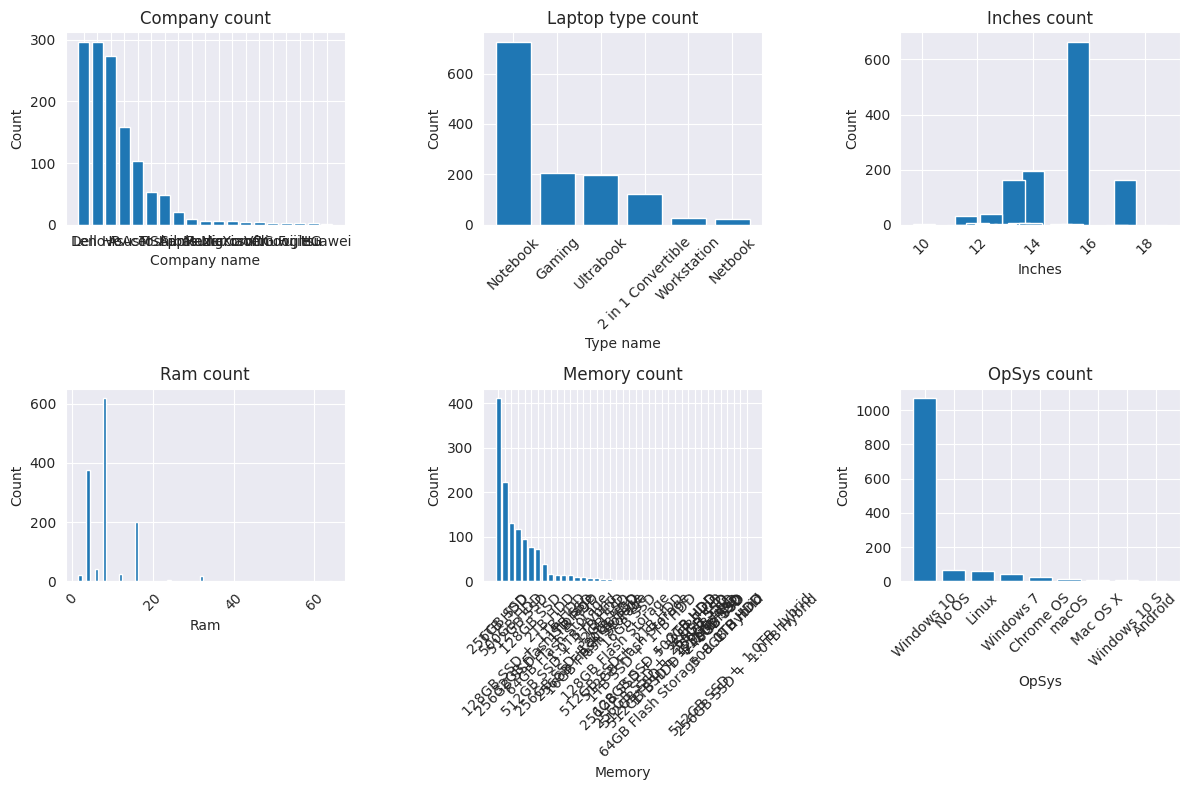

In [ ]:
# Khởi tạo lưới 2x3 cho các biểu đồ
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Biểu đồ 1: Company count
axs[0, 0].bar(laptops["Company"].value_counts().index, laptops["Company"].value_counts().values)
axs[0, 0].set_title("Company count")
axs[0, 0].set_xlabel("Company name")
axs[0, 0].set_ylabel("Count")

# Biểu đồ 2: Laptop type count
axs[0, 1].bar(laptops["TypeName"].value_counts().index, laptops["TypeName"].value_counts().values)
axs[0, 1].set_title("Laptop type count")
axs[0, 1].set_xlabel("Type name")
axs[0, 1].set_ylabel("Count")
axs[0, 1].tick_params(axis='x', rotation=45)

# Biểu đồ 3: Inches count
axs[0, 2].bar(laptops["Inches"].value_counts().index, laptops["Inches"].value_counts().values)
axs[0, 2].set_title("Inches count")
axs[0, 2].set_xlabel("Inches")
axs[0, 2].set_ylabel("Count")
axs[0, 2].tick_params(axis='x', rotation=45)

# Biểu đồ 4: Ram count
axs[1, 0].bar(laptops["Ram"].value_counts().index, laptops["Ram"].value_counts().values)
axs[1, 0].set_title("Ram count")
axs[1, 0].set_xlabel("Ram")
axs[1, 0].set_ylabel("Count")
axs[1, 0].tick_params(axis='x', rotation=45)

# Biểu đồ 5: Memory count
axs[1, 1].bar(laptops["Memory"].value_counts().index, laptops["Memory"].value_counts().values)
axs[1, 1].set_title("Memory count")
axs[1, 1].set_xlabel("Memory")
axs[1, 1].set_ylabel("Count")
axs[1, 1].tick_params(axis='x', rotation=45)

# Biểu đồ 6: OpSys count
axs[1, 2].bar(laptops["OpSys"].value_counts().index, laptops["OpSys"].value_counts().values)
axs[1, 2].set_title("OpSys count")
axs[1, 2].set_xlabel("OpSys")
axs[1, 2].set_ylabel("Count")
axs[1, 2].tick_params(axis='x', rotation=45)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()

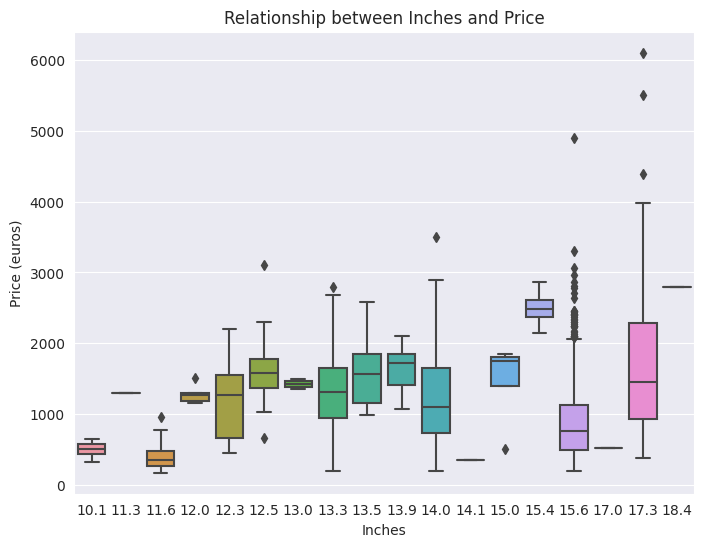

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=laptops, x="Inches", y="Price_euros")
plt.xlabel("Inches")
plt.ylabel("Price (euros)")
plt.title("Relationship between Inches and Price")
plt.show()

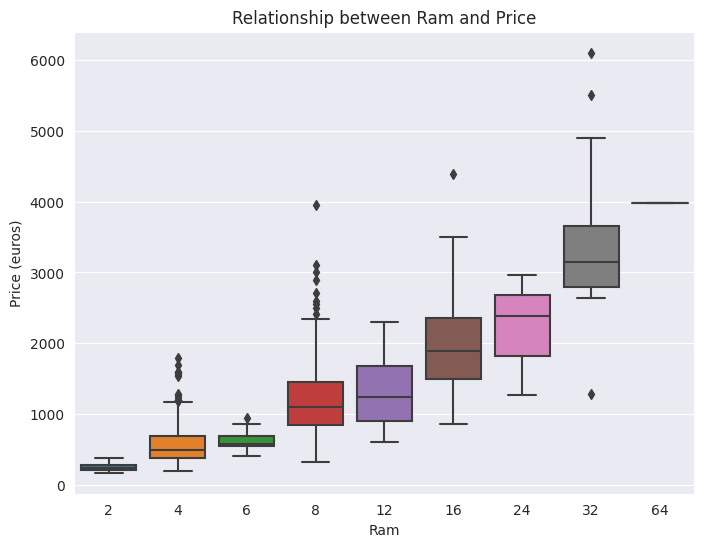

In [ ]:
# Vẽ biểu đồ Box plot cho Ram
plt.figure(figsize=(8, 6))
sns.boxplot(data=laptops, x="Ram", y="Price_euros")
plt.xlabel("Ram")
plt.ylabel("Price (euros)")
plt.title("Relationship between Ram and Price")
plt.show()

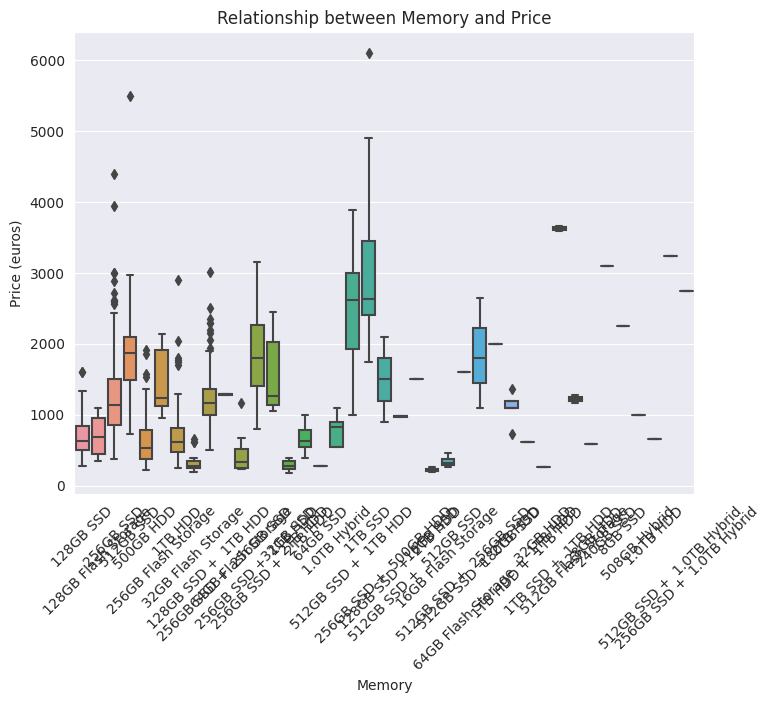

In [ ]:
# Vẽ biểu đồ Box plot cho Memory
plt.figure(figsize=(8, 6))
sns.boxplot(data=laptops, x="Memory", y="Price_euros")
plt.xlabel("Memory")
plt.ylabel("Price (euros)")
plt.title("Relationship between Memory and Price")
plt.xticks(rotation=45)
plt.show()

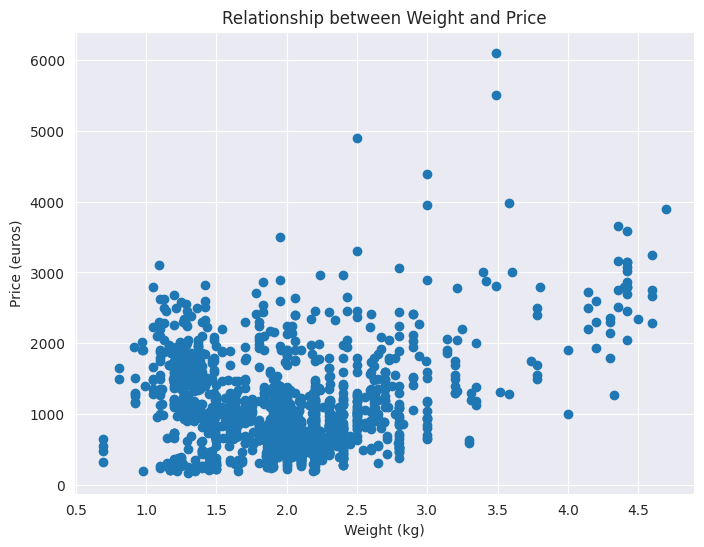

In [ ]:
# Vẽ biểu đồ Scatter plot cho Weight
plt.figure(figsize=(8, 6))
plt.scatter(laptops["Weight"], laptops["Price_euros"])
plt.xlabel("Weight (kg)")
plt.ylabel("Price (euros)")
plt.title("Relationship between Weight and Price")
plt.show()

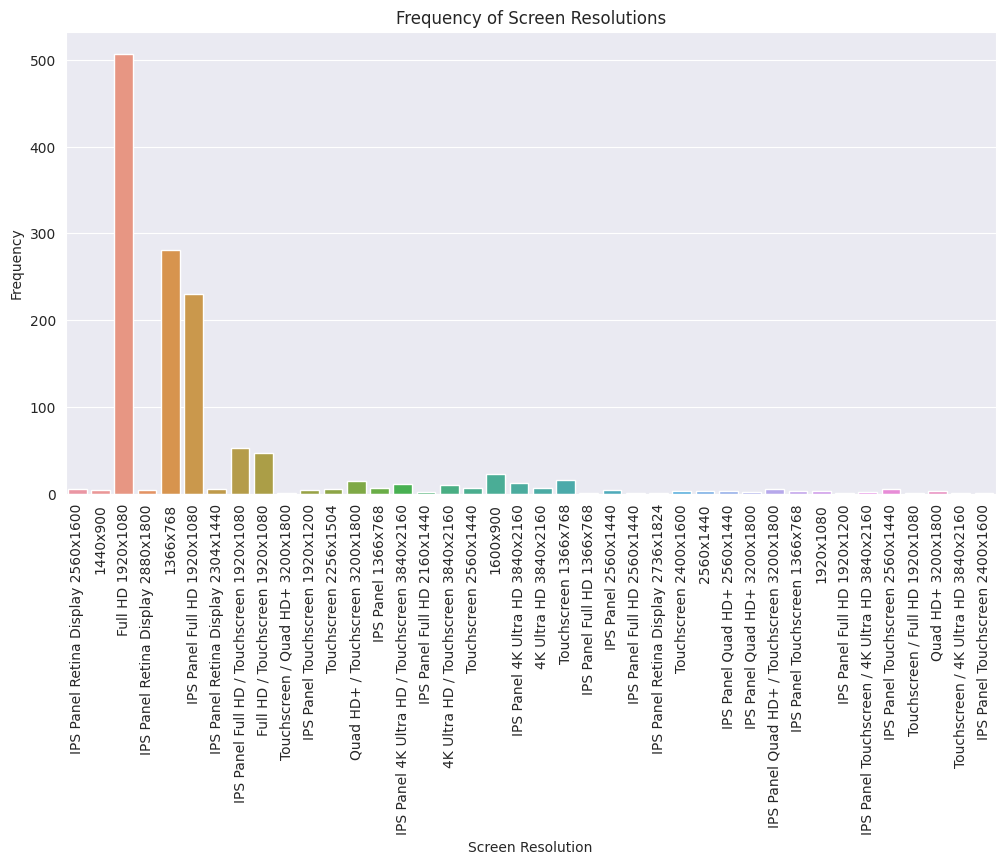

In [ ]:
# Vẽ biểu đồ đường cho tần suất xuất hiện của các độ phân giải màn hình
plt.figure(figsize=(12, 6))
sns.countplot(data=laptops, x="ScreenResolution")
plt.xlabel("Screen Resolution")
plt.ylabel("Frequency")
plt.title("Frequency of Screen Resolutions")
plt.xticks(rotation=90)
plt.show()

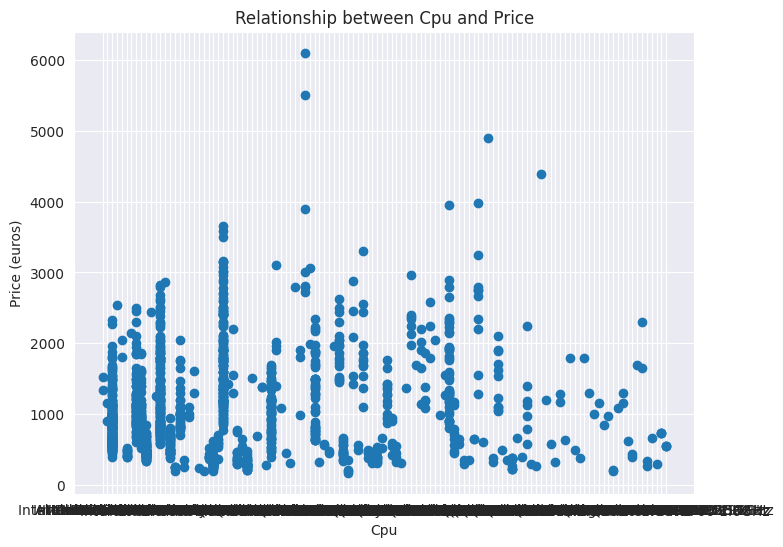

In [ ]:
# Vẽ biểu đồ Scatter plot cho Cpu
plt.figure(figsize=(8, 6))
plt.scatter(laptops["Cpu"], laptops["Price_euros"])
plt.xlabel("Cpu")
plt.ylabel("Price (euros)")
plt.title("Relationship between Cpu and Price")
plt.show()

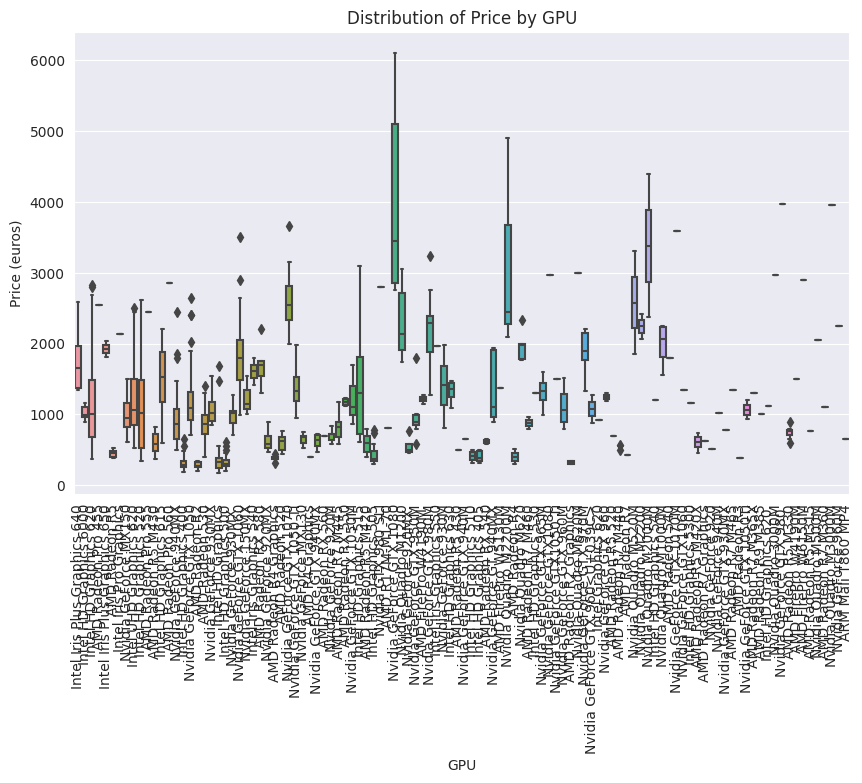

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptops, x="Gpu", y="Price_euros")
plt.xlabel("GPU")
plt.ylabel("Price (euros)")
plt.title("Distribution of Price by GPU")
plt.xticks(rotation=90)
plt.show()

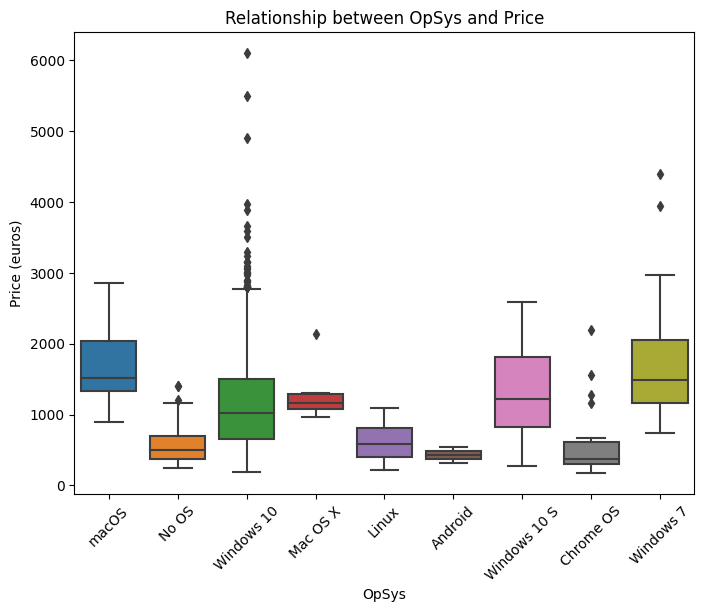

In [ ]:
# Vẽ biểu đồ Box plot cho OpSys
plt.figure(figsize=(8, 6))
sns.boxplot(data=laptops, x="OpSys", y="Price_euros")
plt.xlabel("OpSys")
plt.ylabel("Price (euros)")
plt.title("Relationship between OpSys and Price")
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-7d13a9d76b9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptops['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

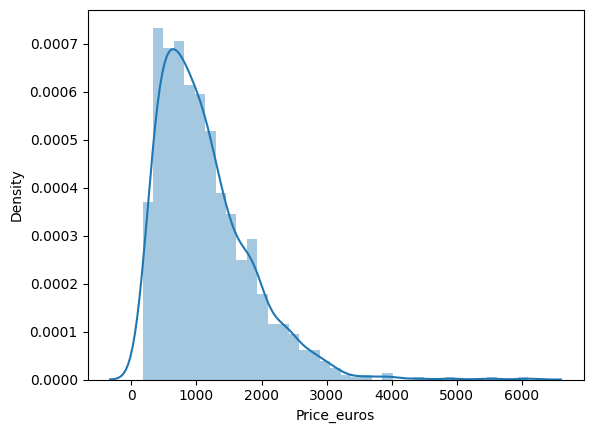

In [ ]:
sns.distplot(laptops['Price_euros'])

# 2. Xử lý dữ liệu


In [ ]:
# Weight
# Chuyển đổi dữ liệu weight thành liên tục bằng cách bỏ đi kí tự kg
laptops["Weight"] = laptops["Weight"].str.replace("kg","")
laptops["Weight"] = pd.to_numeric(laptops["Weight"])

# Ram
# Chuyển đổi dữ liệu Ram thành liên tục bằng cách bỏ đi kí tự GB
laptops["Ram"] = laptops["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)
X = laptops.drop("Price_euros",axis=1)
y = laptops["Price_euros"]
categorical_features = ["Company","Product","TypeName","ScreenResolution","Cpu","Gpu","Memory","OpSys","Ram"]
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)], remainder="passthrough")
# Price
# Chuyển đổi thành giá tiền rời rạc bằng cách thêm một cột 'Price_category' chứa các thuộc tính: 'Rất rẻ', 'Rẻ', 'Trung bình', 'Đắt', 'Rất đắt'
bins = [0, 500, 1000, 1500, 2000, np.inf]
labels = ['Rất rẻ', 'Rẻ', 'Trung bình', 'Đắt', 'Rất đắt']
laptops['Price_category'] = pd.cut(laptops['Price_euros'], bins=bins, labels=labels)



In [ ]:
# Huấn luyện và dự đoán với Decision Tree hoặc mô hình phân loại khác
X = laptops.drop(['Price_euros', 'Price_category'], axis=1)
y = laptops['Price_category']

X_encoded = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   object  
 1   Product           1303 non-null   object  
 2   TypeName          1303 non-null   object  
 3   Inches            1303 non-null   float64 
 4   ScreenResolution  1303 non-null   object  
 5   Cpu               1303 non-null   object  
 6   Ram               1303 non-null   int64   
 7   Memory            1303 non-null   object  
 8   Gpu               1303 non-null   object  
 9   OpSys             1303 non-null   object  
 10  Weight            1303 non-null   float64 
 11  Price_euros       1303 non-null   float64 
 12  Price_category    1303 non-null   category
dtypes: category(1), float64(3), int64(1), object(8)
memory usage: 123.8+ KB


Dữ liệu sau khi được xử lí:
* Bộ dữ liệu gồm 1303 mẫu, 13 đặc trưng:
      'Company', 'Product', 'TypeName','Inches', 'ScreenResolution', 'Cpu',
      'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Price_category'
* Trong đó, có 4 đặc trưng định lượng liên tục (3 float64, 1 int64)
* Tất cả các đặc trưng đều không có giá trị rỗng (non-null), do đó không cần phải xử lý khoản này về sau.



# 3. Đánh giá mô hình

## 3.1 Các thuật toán

In [ ]:
name_scores = ['Accuracy', 'Precision','Recall','F1-score']
score_dt = []
score_svm_lk = []
score_svm_pk = []
score_svm_sk = []
score_svm_gk = []
score_knn = []
score_rf = []
score_nb_m = []
score_nn = []

###3.1.1 Decision Tree

Độ chính xác - Accuracy:  0.6932515337423313
Độ đo F1 - f1score:  0.6536073665593995
Độ chính xác - precision:  0.6528046129309286
Độ phủ - recall:  0.6584118588020835


<ipython-input-332-290be535d219>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


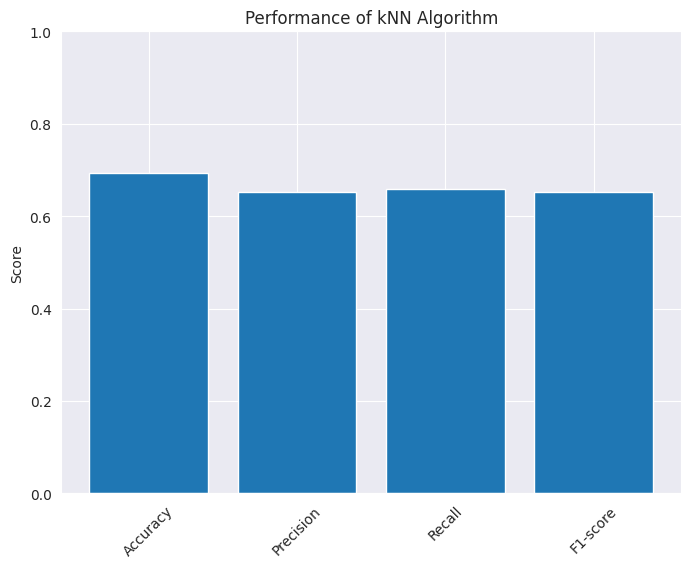

In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtree = dtc.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='macro')
recall_dtree = recall_score(y_test, y_pred_dtree, average='macro')
f1_dtree = f1_score(y_test, y_pred_dtree, average='macro')
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accuracy_dtree)
print("Độ đo F1 - f1score: ", f1_dtree)
print("Độ chính xác - precision: ", precision_dtree)
print("Độ phủ - recall: ", recall_dtree)

# Lưu kết quả để vẽ biểu đồ
score_dt.append(round(accuracy_dtree,4))
score_dt.append(round(precision_dtree,4))
score_dt.append(round(recall_dtree,4))
score_dt.append(round(f1_dtree,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_dt)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

### 3.1.2 SVM

####3.1.2.1 Linear Kernel

Độ chính xác - Accuracy:  0.6871165644171779
Độ đo F1 - f1score:  0.6436193144020022
Độ chính xác - precision:  0.643101754147018
Độ phủ - recall:  0.6481777938261974


<ipython-input-333-0c9d6bd381b6>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


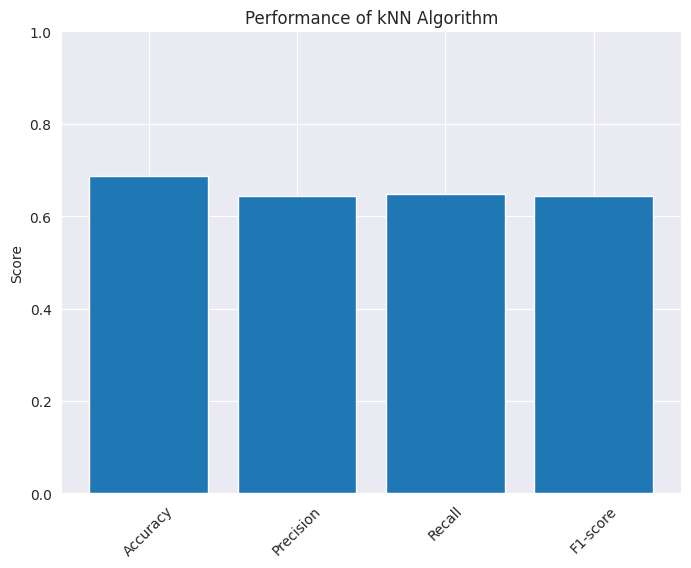

In [ ]:
# Linear Kernel
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
accurary_svm = accuracy_score(y_test,y_pred_svm);
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
cm_svm = confusion_matrix(y_test, y_pred_svm)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_svm)
print("Độ đo F1 - f1score: ", f1_svm)
print("Độ chính xác - precision: ", precision_svm)
print("Độ phủ - recall: ", recall_svm)

# Lưu kết quả để vẽ biểu đồ
score_svm_lk.append(round(accurary_svm,4))
score_svm_lk.append(round(precision_svm,4))
score_svm_lk.append(round(recall_svm,4))
score_svm_lk.append(round(f1_svm,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_svm_lk)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.2.2 Polynomial Kernel

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-334-6711d11bdbd5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


Độ chính xác - Accuracy:  0.5828220858895705
Độ đo F1 - f1score:  0.5057717359899645
Độ chính xác - precision:  0.4842410714285714
Độ phủ - recall:  0.5329722255145984


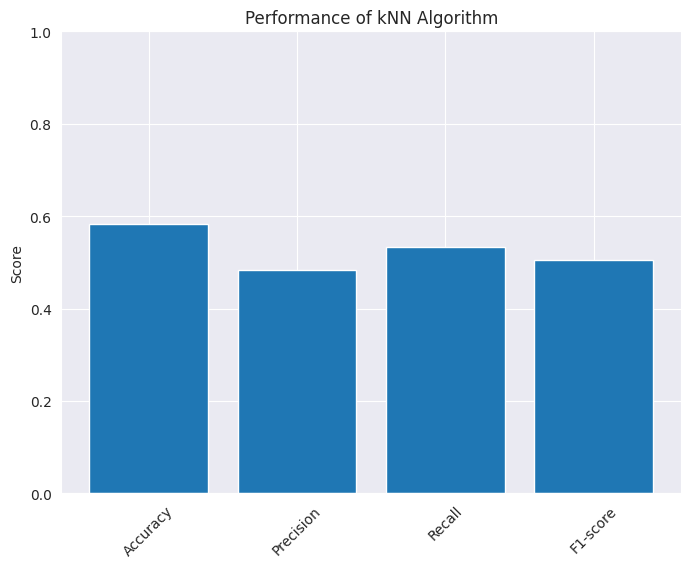

In [ ]:
poly = svm.SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred_poly = poly.predict(X_test)
accurary_poly = accuracy_score(y_test,y_pred_poly);
precision_poly = precision_score(y_test, y_pred_poly,average='macro')
recall_poly = recall_score(y_test, y_pred_poly,average='macro')
f1_poly = f1_score(y_test, y_pred_poly,average='macro')
cm_poly = confusion_matrix(y_test, y_pred_poly)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_poly)
print("Độ đo F1 - f1score: ", f1_poly)
print("Độ chính xác - precision: ", precision_poly)
print("Độ phủ - recall: ", recall_poly)

# Lưu kết quả để vẽ biểu đồ
score_svm_pk.append(round(accurary_poly,4))
score_svm_pk.append(round(precision_poly,4))
score_svm_pk.append(round(recall_poly,4))
score_svm_pk.append(round(f1_poly,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_svm_pk)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.2.3 Sigmoid Kernel

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-335-e7b157f2f0bf>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


Độ chính xác - Accuracy:  0.3619631901840491
Độ đo F1 - f1score:  0.1063063063063063
Độ chính xác - precision:  0.07239263803680981
Độ phủ - recall:  0.2


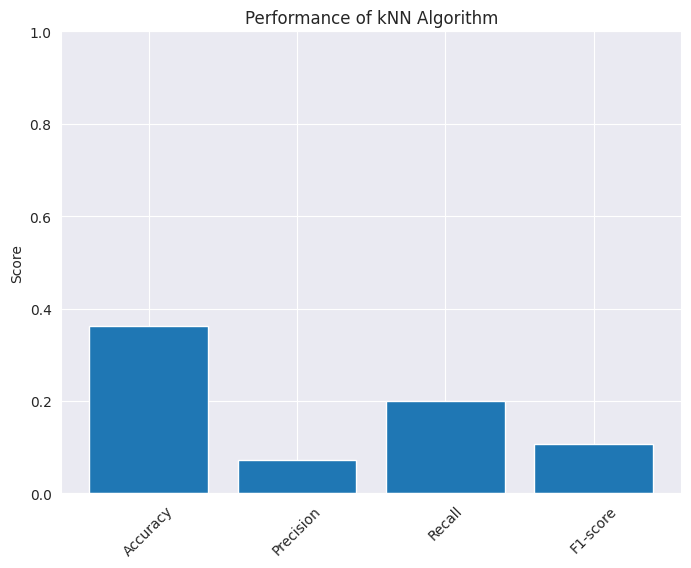

In [ ]:
sigmoid = svm.SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred_sigmoid = sigmoid.predict(X_test)
accurary_sigmoid = accuracy_score(y_test,y_pred_sigmoid);
precision_sigmoid = precision_score(y_test, y_pred_sigmoid,average='macro')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid,average='macro')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid,average='macro')
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_sigmoid)
print("Độ đo F1 - f1score: ", f1_sigmoid)
print("Độ chính xác - precision: ", precision_sigmoid)
print("Độ phủ - recall: ", recall_sigmoid)

# Lưu kết quả để vẽ biểu đồ
score_svm_sk.append(round(accurary_sigmoid,4))
score_svm_sk.append(round(precision_sigmoid,4))
score_svm_sk.append(round(recall_sigmoid,4))
score_svm_sk.append(round(f1_sigmoid,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_svm_sk)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.2.4 Gaussian Kernel

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-336-05f89b5bb4f5>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


Độ chính xác - Accuracy:  0.5460122699386503
Độ đo F1 - f1score:  0.4537772411661648
Độ chính xác - precision:  0.5009125924771203
Độ phủ - recall:  0.4641458259254869


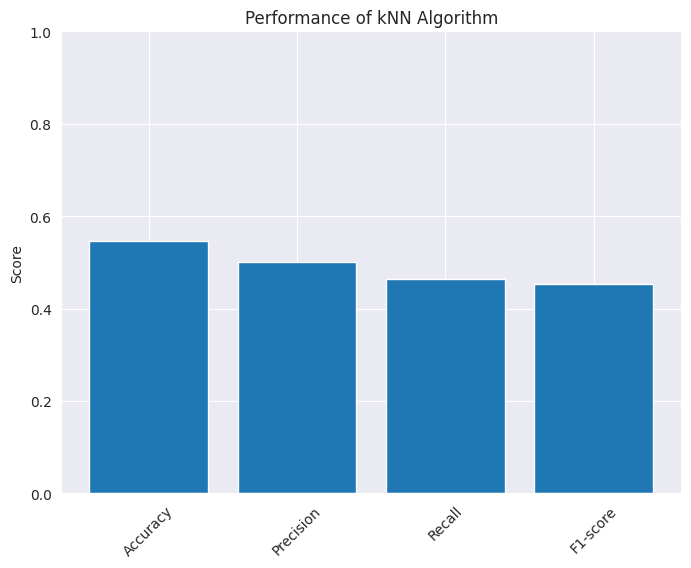

In [ ]:
gauss = svm.SVC(kernel='rbf')
gauss.fit(X_train,y_train)
y_pred_gauss = gauss.predict(X_test)
accurary_gauss = accuracy_score(y_test,y_pred_gauss);
precision_gauss = precision_score(y_test, y_pred_gauss,average='macro')
recall_gauss = recall_score(y_test, y_pred_gauss,average='macro')
f1_gauss = f1_score(y_test, y_pred_gauss,average='macro')
cm_gauss = confusion_matrix(y_test, y_pred_gauss)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_gauss)
print("Độ đo F1 - f1score: ", f1_gauss)
print("Độ chính xác - precision: ", precision_gauss)
print("Độ phủ - recall: ", recall_gauss)

# Lưu kết quả để vẽ biểu đồ
score_svm_gk = []
score_svm_gk.append(round(accurary_gauss,4))
score_svm_gk.append(round(precision_gauss,4))
score_svm_gk.append(round(recall_gauss,4))
score_svm_gk.append(round(f1_gauss,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_svm_gk)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

###3.1.3 KNN

Độ chính xác - Accuracy:  0.6411042944785276
Độ đo F1 - f1score:  0.5892562427787242
Độ chính xác - precision:  0.5887036293022633
Độ phủ - recall:  0.6009911560650623


<ipython-input-337-34482e62e8f9>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


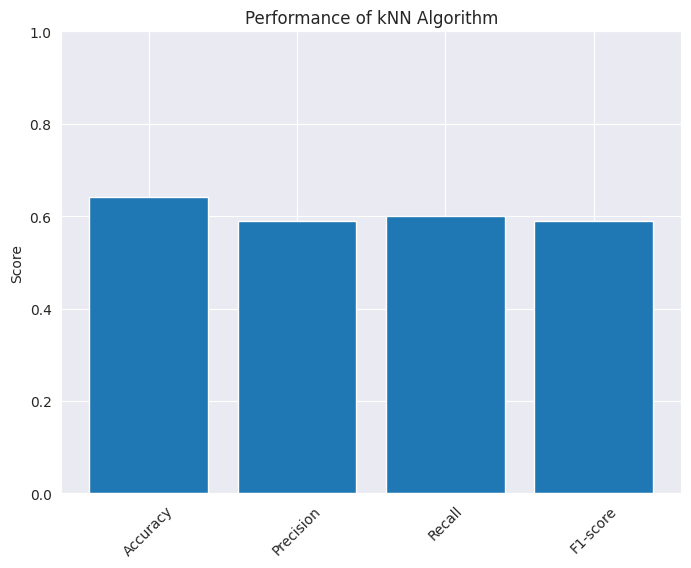

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accurary_knn = accuracy_score(y_test,y_pred_knn);
precision_knn = precision_score(y_test, y_pred_knn,average = 'macro')
recall_knn = recall_score(y_test, y_pred_knn,average = 'macro')
f1_knn = f1_score(y_test, y_pred_knn,average = 'macro')
cm_knn = confusion_matrix(y_test, y_pred_knn)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_knn)
print("Độ đo F1 - f1score: ", f1_knn)
print("Độ chính xác - precision: ", precision_knn)
print("Độ phủ - recall: ", recall_knn)

# Lưu kết quả để vẽ biểu đồ
score_knn.append(round(accurary_knn,4))
score_knn.append(round(precision_knn,4))
score_knn.append(round(recall_knn,4))
score_knn.append(round(f1_knn,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_knn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

###3.1.4 Random Forest

Độ chính xác - Accuracy:  0.7177914110429447
Độ đo F1 - f1score:  0.6778518777063277
Độ chính xác - precision:  0.6847547189652453
Độ phủ - recall:  0.6811804937277937


<ipython-input-338-0bc763936997>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


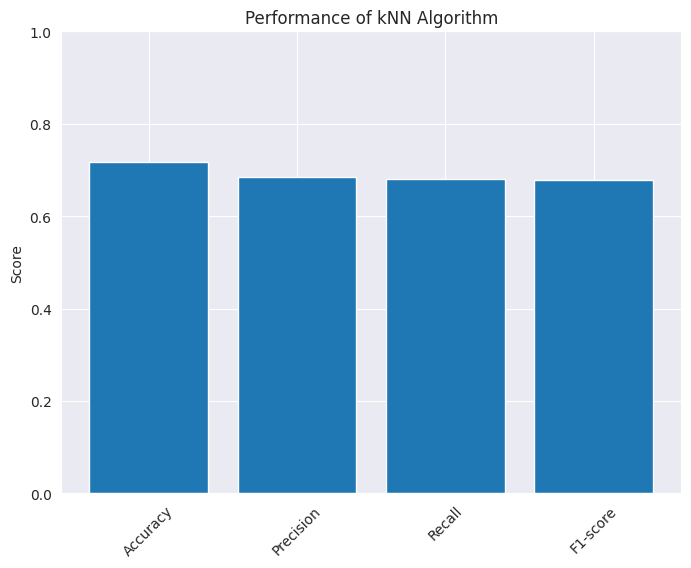

In [ ]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
accurary_rfc = accuracy_score(y_test,y_pred_rfc);
precision_rfc = precision_score(y_test, y_pred_rfc,average='macro')
recall_rfc = recall_score(y_test, y_pred_rfc,average='macro')
f1_rfc = f1_score(y_test, y_pred_rfc,average='macro')
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_rfc)
print("Độ đo F1 - f1score: ", f1_rfc)
print("Độ chính xác - precision: ", precision_rfc)
print("Độ phủ - recall: ", recall_rfc)

# Lưu kết quả để vẽ biểu đồ
score_rf.append(round(accurary_rfc,4))
score_rf.append(round(precision_rfc,4))
score_rf.append(round(recall_rfc,4))
score_rf.append(round(f1_rfc,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_rf)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

###3.1.5 NAIVE BAYES

####3.1.5.1 GaussianNB

Độ chính xác - Accuracy:  0.49693251533742333
Độ đo F1 - f1score:  0.4988176512711095
Độ chính xác - precision:  0.5066817496229261
Độ phủ - recall:  0.5650107155359423


<ipython-input-339-5d2a5a00f40a>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


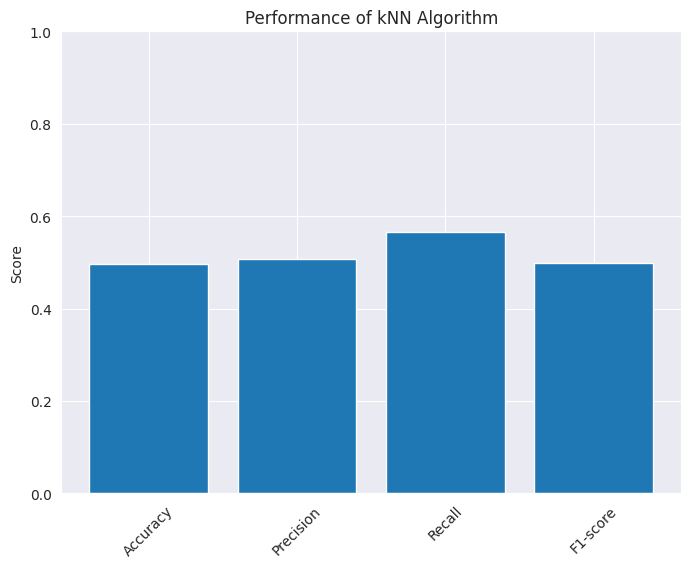

In [ ]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
y_pred_gaussNB = gaussNB.predict(X_test)
accurary_gaussNB = accuracy_score(y_test,y_pred_gaussNB);
precision_gaussNB = precision_score(y_test, y_pred_gaussNB,average='macro')
recall_gaussNB = recall_score(y_test, y_pred_gaussNB,average='macro')
f1_gaussNB = f1_score(y_test, y_pred_gaussNB,average='macro')
cm_gaussNB = confusion_matrix(y_test, y_pred_gaussNB)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_gaussNB)
print("Độ đo F1 - f1score: ", f1_gaussNB)
print("Độ chính xác - precision: ", precision_gaussNB)
print("Độ phủ - recall: ", recall_gaussNB)

# Lưu kết quả để vẽ biểu đồ
score_knn = []
score_knn.append(round(accurary_gaussNB,4))
score_knn.append(round(precision_gaussNB,4))
score_knn.append(round(recall_gaussNB,4))
score_knn.append(round(f1_gaussNB,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_knn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.5.2 BernoulliNB

Độ chính xác - Accuracy:  0.6625766871165644
Độ đo F1 - f1score:  0.6036648730344976
Độ chính xác - precision:  0.6485099125297145
Độ phủ - recall:  0.6024379119107144


<ipython-input-340-88765cc6a27a>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


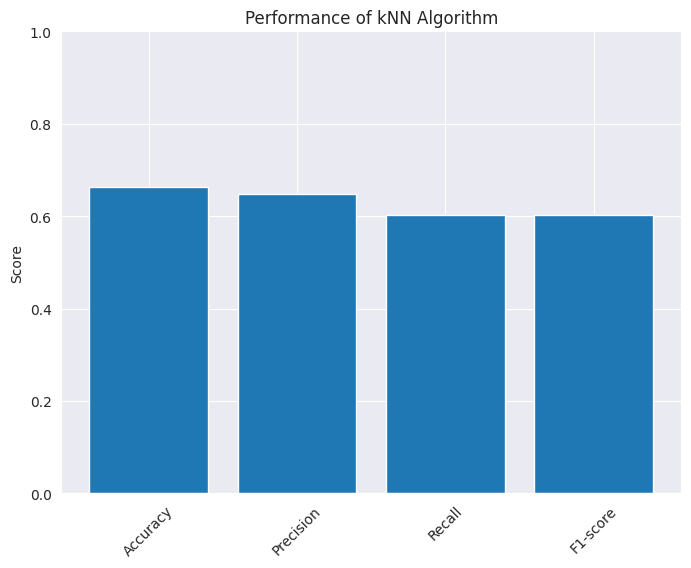

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
y_pred_bernoulli = bernoulli.predict(X_test)

accurary_bernoulli = accuracy_score(y_test,y_pred_bernoulli);
precision_bernoulli = precision_score(y_test, y_pred_bernoulli,average='macro')
recall_bernoulli = recall_score(y_test, y_pred_bernoulli,average='macro')
f1_bernoulli = f1_score(y_test, y_pred_bernoulli,average='macro')
cm_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_bernoulli)
print("Độ đo F1 - f1score: ", f1_bernoulli)
print("Độ chính xác - precision: ", precision_bernoulli)
print("Độ phủ - recall: ", recall_bernoulli)

# Lưu kết quả để vẽ biểu đồ
score_knn = []
score_knn.append(round(accurary_bernoulli,4))
score_knn.append(round(precision_bernoulli,4))
score_knn.append(round(recall_bernoulli,4))
score_knn.append(round(f1_bernoulli,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_knn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.5.3 MultinomialNB

Độ chính xác - Accuracy:  0.6687116564417178
Độ đo F1 - f1score:  0.6127438439806773
Độ chính xác - precision:  0.6618089340999559
Độ phủ - recall:  0.6099926312027218


<ipython-input-341-5b01faee7fa8>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


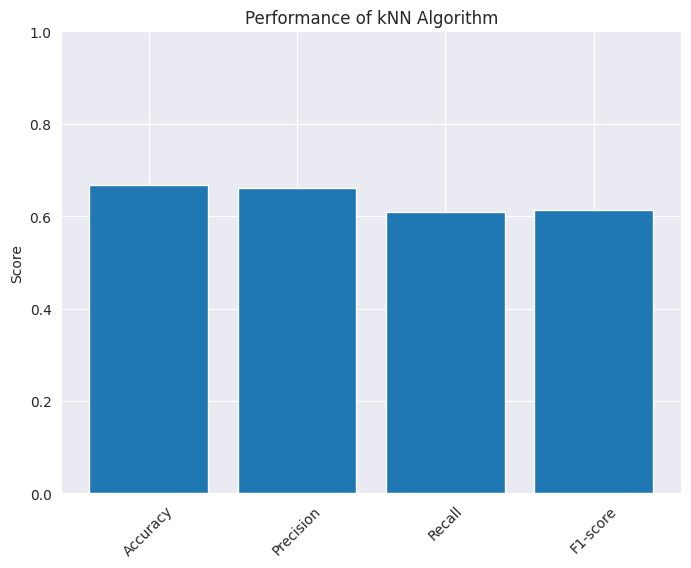

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(X_train, y_train)
y_pred_multiNB = multiNB.predict(X_test)

accurary_multiNB = accuracy_score(y_test,y_pred_multiNB);
precision_multiNB = precision_score(y_test, y_pred_multiNB,average='macro')
recall_multiNB = recall_score(y_test, y_pred_multiNB,average='macro')
f1_multiNB = f1_score(y_test, y_pred_multiNB,average='macro')
cm_multiNB = confusion_matrix(y_test, y_pred_multiNB)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_multiNB)
print("Độ đo F1 - f1score: ", f1_multiNB)
print("Độ chính xác - precision: ", precision_multiNB)
print("Độ phủ - recall: ", recall_multiNB)

# Lưu kết quả để vẽ biểu đồ
score_nb_m.append(round(accurary_multiNB,4))
score_nb_m.append(round(precision_multiNB,4))
score_nb_m.append(round(recall_multiNB,4))
score_nb_m.append(round(f1_multiNB,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_nb_m)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

####3.1.5.4 ComplementNB

Độ chính xác - Accuracy:  0.6656441717791411
Độ đo F1 - f1score:  0.6337400478162561
Độ chính xác - precision:  0.622230103075733
Độ phủ - recall:  0.6646589220791034


<ipython-input-342-b96934f8341f>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


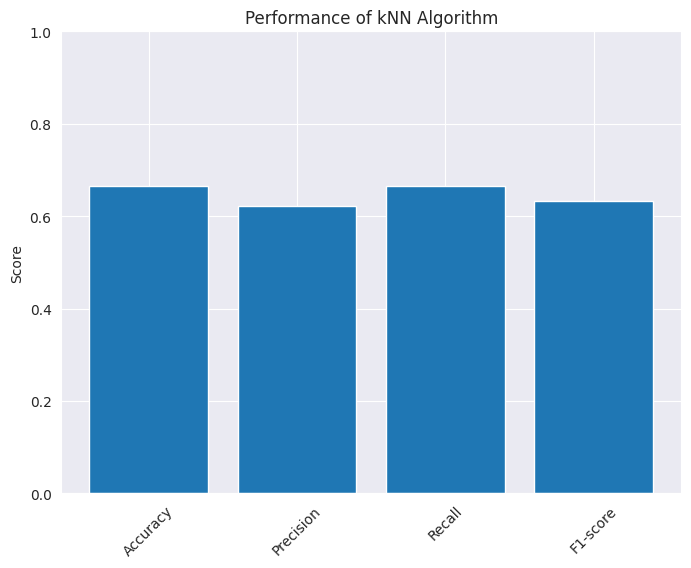

In [ ]:
from sklearn.naive_bayes import ComplementNB
comple = ComplementNB()
comple.fit(X_train, y_train)
y_pred_comple = comple.predict(X_test)

accurary_comple = accuracy_score(y_test,y_pred_comple);
precision_comple = precision_score(y_test, y_pred_comple,average='macro')
recall_comple = recall_score(y_test, y_pred_comple,average='macro')
f1_comple = f1_score(y_test, y_pred_comple,average='macro')
cm_comple = confusion_matrix(y_test, y_pred_comple)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accurary_comple)
print("Độ đo F1 - f1score: ", f1_comple)
print("Độ chính xác - precision: ", precision_comple)
print("Độ phủ - recall: ", recall_comple)

# Lưu kết quả để vẽ biểu đồ
score_knn = []
score_knn.append(round(accurary_comple,4))
score_knn.append(round(precision_comple,4))
score_knn.append(round(recall_comple,4))
score_knn.append(round(f1_comple,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_knn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

### 3.1.6 Neural network

Epoch 1/50
10/10 [==============================] - 3s 18ms/step - loss: 1.6396 - accuracy: 0.2884
Epoch 2/50
10/10 [==============================] - 0s 28ms/step - loss: 1.0576 - accuracy: 0.6271
Epoch 3/50
10/10 [==============================] - 0s 24ms/step - loss: 0.6514 - accuracy: 0.7944
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4166 - accuracy: 0.8703
Epoch 5/50
10/10 [==============================] - 0s 24ms/step - loss: 0.2816 - accuracy: 0.9121
Epoch 6/50
10/10 [==============================] - 0s 23ms/step - loss: 0.2237 - accuracy: 0.9369
Epoch 7/50
10/10 [==============================] - 0s 31ms/step - loss: 0.1804 - accuracy: 0.9471
Epoch 8/50
10/10 [==============================] - 0s 18ms/step - loss: 0.1523 - accuracy: 0.9565
Epoch 9/50
10/10 [==============================] - 0s 18ms/step - loss: 0.1381 - accuracy: 0.9556
Epoch 10/50
10/10 [==============================] - 0s 19ms/step - loss: 0.1260 - accuracy: 0.9650
Epoch 11/

<ipython-input-343-f1b7fe3e6c09>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


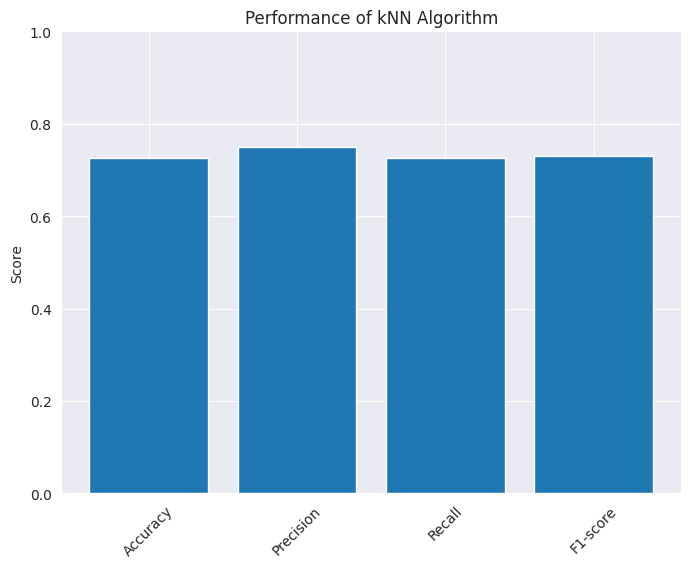

In [ ]:
# Ánh xạ dữ liệu nhãn sang giá trị số nguyên
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Tiến hành tiền xử lý dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.1, random_state=42)

# Xác định kích thước đầu vào
input_dim = X_train.shape[1]

# Xây dựng mô hình
model = Sequential()
model.add(Dense(500, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile mô hình
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)
# Dự đoán nhãn cho tập dữ liệu test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Lưu kết quả để vẽ biểu đồ
score_nn.append(round(accuracy,4))
score_nn.append(round(precision,4))
score_nn.append(round(recall,4))
score_nn.append(round(f1,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_nn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()

## 3.2 So sánh kết quả

+-------------------+----------+-----------+--------+------+
|     algorithms    | accuracy | precision | recall |  f1  |
+-------------------+----------+-----------+--------+------+
|   Decision Tree   |   0.69   |    0.65   |  0.66  | 0.65 |
|   Linear Kernel   |   0.69   |    0.64   |  0.65  | 0.64 |
| Polynomial Kernel |   0.58   |    0.48   |  0.53  | 0.51 |
|   Sigmoid Kernel  |   0.36   |    0.07   |  0.2   | 0.11 |
|  Gaussian Kernel  |   0.55   |    0.5    |  0.46  | 0.45 |
|        KNN        |   0.64   |    0.59   |  0.6   | 0.59 |
|   Random Forest   |   0.72   |    0.68   |  0.68  | 0.68 |
|    ComplementNB   |   0.67   |    0.62   |  0.66  | 0.63 |
|   Neural Network  |   0.73   |    0.75   |  0.73  | 0.73 |
+-------------------+----------+-----------+--------+------+


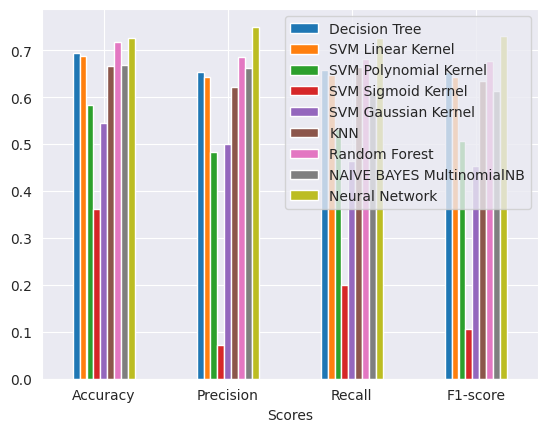

In [ ]:
# Tạo DataFrame
df = pd.DataFrame(list(zip(name_scores, score_dt, score_svm_lk, score_svm_pk, score_svm_sk, score_svm_gk, score_knn, score_rf, score_nb_m, score_nn)),
                  columns=["Scores","Decision Tree", "SVM Linear Kernel","SVM Polynomial Kernel", "SVM Sigmoid Kernel","SVM Gaussian Kernel", "KNN", "Random Forest", "NAIVE BAYES MultinomialNB", "Neural Network"])

# In ra bảng kết quả
t = PrettyTable(['algorithms','accuracy','precision','recall','f1'])

t.add_row(['Decision Tree',round(accuracy_dtree, 2),round(precision_dtree, 2),round(recall_dtree, 2),round(f1_dtree, 2)])
t.add_row(['Linear Kernel',round(accurary_svm, 2),round(precision_svm, 2),round(recall_svm, 2),round(f1_svm, 2)])
t.add_row(['Polynomial Kernel',round(accurary_poly, 2),round(precision_poly, 2),round(recall_poly, 2),round(f1_poly, 2)])
t.add_row(['Sigmoid Kernel',round(accurary_sigmoid, 2),round(precision_sigmoid, 2),round(recall_sigmoid, 2),round(f1_sigmoid, 2)])
t.add_row(['Gaussian Kernel',round(accurary_gauss, 2),round(precision_gauss, 2),round(recall_gauss, 2),round(f1_gauss, 2)])
t.add_row(['KNN',round(accurary_knn, 2),round(precision_knn, 2),round(recall_knn, 2),round(f1_knn, 2)])
t.add_row(['Random Forest',round(accurary_rfc, 2),round(precision_rfc, 2),round(recall_rfc, 2),round(f1_rfc, 2)])
t.add_row(['ComplementNB',round(accurary_comple, 2),round(precision_comple, 2),round(recall_comple, 2),round(f1_comple, 2)])
t.add_row(['Neural Network',round(accuracy, 2),round(precision, 2),round(recall, 2),round(f1, 2)])
print(t)
ax = df.plot.bar(x='Scores', rot=0)